<a href="https://colab.research.google.com/github/abakashi/dinamicas_dex_days/blob/main/dinamica_day_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '${:,.4f}'.format

In [119]:
dataset = pd.read_csv('2019-Nov.csv')
dataset['event_time'] = pd.to_datetime(dataset['event_time'],
                        format='%Y-%m-%d %H:%M:%S %Z')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4635837 entries, 0 to 4635836
Data columns (total 9 columns):
 #   Column         Dtype              
---  ------         -----              
 0   event_time     datetime64[ns, UTC]
 1   event_type     object             
 2   product_id     int64              
 3   category_id    int64              
 4   category_code  object             
 5   brand          object             
 6   price          float64            
 7   user_id        int64              
 8   user_session   object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(3), object(4)
memory usage: 318.3+ MB


In [120]:
dataset.price.describe(percentiles=[0.01, 0.10, 0.25, 0.50, 0.75, 0.99])
#preços negativos detectados. Iniciando análise.

count   $4,635,837.0000
mean            $8.1207
std            $18.7920
min           $-79.3700
1%              $0.3000
10%             $0.8700
25%             $1.9400
50%             $3.9700
75%             $6.3500
99%            $93.6500
max           $327.7800
Name: price, dtype: float64

In [121]:
null_percent = dict()
columns = tuple(dataset.columns)

for column in columns:
  null_percent[column] = dataset[column].isna().sum() / dataset.shape[0]

sorted(null_percent.items(), key=lambda x: x[1], reverse=True)

# O category_code é o que mais possui valores nulos, seguido de brand.
# Brand (marca) é importante para a análise a ser desenvolvida, logo, deve ser
# mantida.
# sugestão de remover o category_code.

[('category_code', 0.9836603400852963),
 ('brand', 0.42840785817102717),
 ('user_session', 0.0001753728614703235),
 ('event_time', 0.0),
 ('event_type', 0.0),
 ('product_id', 0.0),
 ('category_id', 0.0),
 ('price', 0.0),
 ('user_id', 0.0)]

In [122]:
#verificando linhas duplicadas:
dataset.duplicated().sum()
#linhas duplicadas encontradas

246693

In [123]:
#removendo linhas duplicadas
dataset = dataset[~dataset.duplicated()]
dataset

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:02+00:00,view,5802432,1487580009286598681,NaN,NaN,$0.3200,562076640,09fafd6c-6c99-46b1-834f-33527f4de241
1,2019-11-01 00:00:09+00:00,cart,5844397,1487580006317032337,NaN,NaN,$2.3800,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb
2,2019-11-01 00:00:10+00:00,view,5837166,1783999064103190764,NaN,pnb,$22.2200,556138645,57ed222e-a54a-4907-9944-5a875c2d7f4f
3,2019-11-01 00:00:11+00:00,cart,5876812,1487580010100293687,NaN,jessnail,$3.1600,564506666,186c1951-8052-4b37-adce-dd9644b1d5f7
4,2019-11-01 00:00:24+00:00,remove_from_cart,5826182,1487580007483048900,NaN,NaN,$3.3300,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb
...,...,...,...,...,...,...,...,...,...
4635832,2019-11-30 23:59:46+00:00,view,5830317,1487580009496313889,NaN,NaN,$4.7600,457678989,ee50b160-a4db-4722-8751-6812c5b38295
4635833,2019-11-30 23:59:47+00:00,view,5733064,1487580004832248652,NaN,beautix,$9.3700,422196217,ab5e6dd5-8700-4ecc-a300-9f1eca5d1a95
4635834,2019-11-30 23:59:47+00:00,view,5867785,1487580007835370453,NaN,kims,$31.1000,572579084,d42865b7-7e04-4038-9be0-a59165625f06
4635835,2019-11-30 23:59:57+00:00,view,5779406,2151191071051219817,NaN,NaN,$2.8600,540006764,d4b5aa49-d731-40f1-92f1-277416d6e063


In [124]:
#removendo category_code
dataset.drop('category_code', axis=1, inplace=True)

In [125]:
#Buscando por eventos cujos preços são negativos.
neg_price = dataset[dataset['price'] < 0].sort_values('price')

print(neg_price.shape)
neg_price
# Os eventos são do tipo compra, não deveriam ter valores negativos.

(16, 8)


,event_time,event_type,product_id,category_id,brand,price,user_id,user_session
749942,2019-11-06 17:31:51+00:00,purchase,5716861,1487580014042939619,NaN,$-79.3700,554241372,b85719db-2c56-460b-b800-d7a47d4c4d70
330623,2019-11-03 18:47:04+00:00,purchase,5716859,1487580014042939619,NaN,$-47.6200,567194545,fd27b149-3006-41cd-8afc-884c47272e5d
2909975,2019-11-21 19:34:16+00:00,purchase,5716859,1487580014042939619,NaN,$-47.6200,419166079,7e76a460-adb4-4e3f-9c85-c08a97016aa0
3093813,2019-11-22 13:46:53+00:00,purchase,5716859,1487580014042939619,NaN,$-47.6200,540003383,33da1676-00df-4f21-b87e-4c1b9b09420c
3306219,2019-11-23 13:30:53+00:00,purchase,5716859,1487580014042939619,NaN,$-47.6200,574878046,b60c5299-7a53-e636-6dc3-c7fd5d86452b
408237,2019-11-04 11:54:29+00:00,purchase,5716857,1487580014042939619,NaN,$-23.8100,516725846,26e74f0c-762a-4162-b807-72a3e7bfa015
1372173,2019-11-10 20:16:38+00:00,purchase,5716857,1487580014042939619,NaN,$-23.8100,549736485,d1acbc83-3876-4317-a00f-6c60800f4572
2310273,2019-11-18 07:06:17+00:00,purchase,5716857,1487580014042939619,NaN,$-23.8100,565309368,47af9baa-94af-4334-a4ac-514230ddfa9c
3114212,2019-11-22 15:18:19+00:00,purchase,5716857,1487580014042939619,NaN,$-23.8100,541269785,3d92c5f7-5d6d-4df6-83ad-6fcdb4078761
4378008,2019-11-29 14:00:23+00:00,purchase,5716857,1487580014042939619,NaN,$-23.8100,480927132,e2a0c787-1f5b-4bd6-b449-9818addd688f


In [126]:
#Averiguando categorias de ID que possam ser relevantes dentro do subconjunto.
neg_unique = {'category_id': neg_price.category_id.unique(),
              'product_id': neg_price.product_id.unique()}
neg_unique

{'category_id': array([1487580014042939619]),
 'product_id': array([5716861, 5716859, 5716857, 5670257, 5716855])}

In [127]:
#ID de categoria se mostrou irrelevante para a análise.
print(dataset[dataset['category_id'].isin(neg_unique['category_id'])].shape)
dataset[dataset['category_id'].isin(neg_unique['category_id'])]

(92, 8)


,event_time,event_type,product_id,category_id,brand,price,user_id,user_session
51479,2019-11-01 12:19:19+00:00,view,5670256,1487580014042939619,NaN,$15.8700,405803169,0afafe28-c096-4c9e-a0c2-1e2ece25b41c
52064,2019-11-01 12:23:46+00:00,view,5670256,1487580014042939619,NaN,$15.8700,479313682,91fbeeeb-a757-4732-92d9-9e0f45f2daf2
73174,2019-11-01 15:36:23+00:00,purchase,5716855,1487580014042939619,NaN,$-7.9400,566480066,34fa4291-9e2e-470f-a678-b84d9bbbdfe3
87049,2019-11-01 17:50:51+00:00,view,5670256,1487580014042939619,NaN,$15.8700,554241372,b6da9e24-30be-4ca0-a572-65b1c824c3c3
87772,2019-11-01 17:56:30+00:00,view,5670256,1487580014042939619,NaN,$15.8700,376918481,3240bc51-3851-40a5-a577-0099f94a5328
...,...,...,...,...,...,...,...,...
4337950,2019-11-29 10:35:37+00:00,cart,5670256,1487580014042939619,NaN,$15.8700,578851754,3b544ef7-65cb-45c4-987b-0eb8c2b34f29
4340630,2019-11-29 10:48:18+00:00,purchase,5670257,1487580014042939619,NaN,$-15.8700,569446220,14de64e5-bfbf-43e4-a3d9-362caf9f847e
4369944,2019-11-29 13:19:03+00:00,view,5670256,1487580014042939619,NaN,$15.8700,578809743,e243b7d6-45b0-4be1-838c-cd51b134f08e
4378008,2019-11-29 14:00:23+00:00,purchase,5716857,1487580014042939619,NaN,$-23.8100,480927132,e2a0c787-1f5b-4bd6-b449-9818addd688f


In [128]:
#Os preços negativos advém de determinados produtos, potencialmente um erro de
#digitação.
print(dataset[dataset['product_id'].isin(neg_unique['product_id'])].shape)
dataset[dataset['product_id'].isin(neg_unique['product_id'])]

(16, 8)


,event_time,event_type,product_id,category_id,brand,price,user_id,user_session
73174,2019-11-01 15:36:23+00:00,purchase,5716855,1487580014042939619,NaN,$-7.9400,566480066,34fa4291-9e2e-470f-a678-b84d9bbbdfe3
330623,2019-11-03 18:47:04+00:00,purchase,5716859,1487580014042939619,NaN,$-47.6200,567194545,fd27b149-3006-41cd-8afc-884c47272e5d
408236,2019-11-04 11:54:29+00:00,purchase,5670257,1487580014042939619,NaN,$-15.8700,516725846,26e74f0c-762a-4162-b807-72a3e7bfa015
408237,2019-11-04 11:54:29+00:00,purchase,5716857,1487580014042939619,NaN,$-23.8100,516725846,26e74f0c-762a-4162-b807-72a3e7bfa015
706884,2019-11-06 11:51:26+00:00,purchase,5670257,1487580014042939619,NaN,$-15.8700,568159131,8edce83b-2d4c-4654-89e6-16234303031c
749942,2019-11-06 17:31:51+00:00,purchase,5716861,1487580014042939619,NaN,$-79.3700,554241372,b85719db-2c56-460b-b800-d7a47d4c4d70
749943,2019-11-06 17:31:51+00:00,purchase,5670257,1487580014042939619,NaN,$-15.8700,554241372,b85719db-2c56-460b-b800-d7a47d4c4d70
1372173,2019-11-10 20:16:38+00:00,purchase,5716857,1487580014042939619,NaN,$-23.8100,549736485,d1acbc83-3876-4317-a00f-6c60800f4572
2310273,2019-11-18 07:06:17+00:00,purchase,5716857,1487580014042939619,NaN,$-23.8100,565309368,47af9baa-94af-4334-a4ac-514230ddfa9c
2909975,2019-11-21 19:34:16+00:00,purchase,5716859,1487580014042939619,NaN,$-47.6200,419166079,7e76a460-adb4-4e3f-9c85-c08a97016aa0


In [129]:
#eliminando linhas com produtos com erro de digitação.
dataset = dataset[~dataset['product_id'].isin(neg_unique['product_id'])]
dataset.describe()

,product_id,category_id,price,user_id
count,"$4,389,128.0000","$4,389,128.0000","$4,389,128.0000","$4,389,128.0000"
mean,"$5,478,795.2497","$1,550,290,682,338,280,192.0000",$8.3088,"$507,194,601.8222"
std,"$1,311,015.5405","$164,543,480,419,501,600.0000",$19.1604,"$85,407,159.8352"
min,"$3,752.0000","$1,487,580,004,832,248,576.0000",$0.0000,"$1,120,748.0000"
25%,"$5,723,529.0000","$1,487,580,005,713,052,416.0000",$1.9800,"$470,483,102.0000"
50%,"$5,810,145.0000","$1,487,580,008,246,412,288.0000",$3.9700,"$543,280,656.0000"
75%,"$5,856,186.0000","$1,487,580,013,229,244,672.0000",$6.6500,"$568,227,111.0000"
max,"$5,909,246.0000","$2,195,085,258,339,123,456.0000",$327.7800,"$579,969,854.0000"


In [130]:
dataset['event_type'].unique()

array(['view', 'cart', 'remove_from_cart', 'purchase'], dtype=object)

In [131]:
brands = dataset.brand.unique()[1:]
num_bran = len(brands)

num_bran
# Existem 239 marcas únicas

239

In [132]:
#criando um dataframe com os registros sem marca.
df_brandless = dataset[dataset.brand.isna()]
df_brandless.head()

,event_time,event_type,product_id,category_id,brand,price,user_id,user_session
0,2019-11-01 00:00:02+00:00,view,5802432,1487580009286598681,NaN,$0.3200,562076640,09fafd6c-6c99-46b1-834f-33527f4de241
1,2019-11-01 00:00:09+00:00,cart,5844397,1487580006317032337,NaN,$2.3800,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb
4,2019-11-01 00:00:24+00:00,remove_from_cart,5826182,1487580007483048900,NaN,$3.3300,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb
7,2019-11-01 00:00:32+00:00,view,5837835,1933472286753424063,NaN,$3.4900,514649199,432a4e95-375c-4b40-bd36-0fc039e77580
11,2019-11-01 00:00:46+00:00,view,5841721,1487580008187692007,NaN,$1.3700,429913900,2f0bff3c-252f-4fe6-afcd-5d8a6a92839a


In [133]:
#Criando um dataframe onde todas os registros têm marca.
df_branded = dataset[~dataset.brand.isna()]
df_branded

,event_time,event_type,product_id,category_id,brand,price,user_id,user_session
2,2019-11-01 00:00:10+00:00,view,5837166,1783999064103190764,pnb,$22.2200,556138645,57ed222e-a54a-4907-9944-5a875c2d7f4f
3,2019-11-01 00:00:11+00:00,cart,5876812,1487580010100293687,jessnail,$3.1600,564506666,186c1951-8052-4b37-adce-dd9644b1d5f7
6,2019-11-01 00:00:25+00:00,view,5856189,1487580009026551821,runail,$15.7100,562076640,09fafd6c-6c99-46b1-834f-33527f4de241
8,2019-11-01 00:00:34+00:00,remove_from_cart,5870838,1487580007675986893,milv,$0.7900,429913900,2f0bff3c-252f-4fe6-afcd-5d8a6a92839a
9,2019-11-01 00:00:37+00:00,view,5870803,1487580007675986893,milv,$0.7900,429913900,2f0bff3c-252f-4fe6-afcd-5d8a6a92839a
...,...,...,...,...,...,...,...,...
4635828,2019-11-30 23:59:27+00:00,remove_from_cart,5801131,1487580005486560104,irisk,$3.6500,566513990,b5053009-b3c4-4581-b05f-6199d1a2037e
4635830,2019-11-30 23:59:32+00:00,view,5795387,1487580005713052531,ingarden,$7.1400,576802932,2dc9ed07-93bb-47db-abe7-e9d88ed7ae94
4635833,2019-11-30 23:59:47+00:00,view,5733064,1487580004832248652,beautix,$9.3700,422196217,ab5e6dd5-8700-4ecc-a300-9f1eca5d1a95
4635834,2019-11-30 23:59:47+00:00,view,5867785,1487580007835370453,kims,$31.1000,572579084,d42865b7-7e04-4038-9be0-a59165625f06


In [134]:
#Fazendo o estudo do preço para o dataframe novo
price_br = pd.DataFrame(df_branded.price.describe(percentiles=[0.01, 0.1, 0.25, 0.5, 0.75, 0.99]))
iqr = price_br.loc['75%'] - price_br.loc['25%']
bounds = (float((price_br.loc['25%'] - 1.5*iqr)),float((price_br.loc['75%'] + 1.5*iqr)))
bounds

(-5.375, 14.024999999999999)

In [135]:
#verificando quantidade de items por marca.
df_branded.brand.value_counts()

runail       304915
grattol      192985
irisk        191367
masura       173282
bpw.style    123356
              ...  
shifei            3
macadamia         2
footlogix         2
dessata           2
ibd               1
Name: brand, Length: 239, dtype: int64

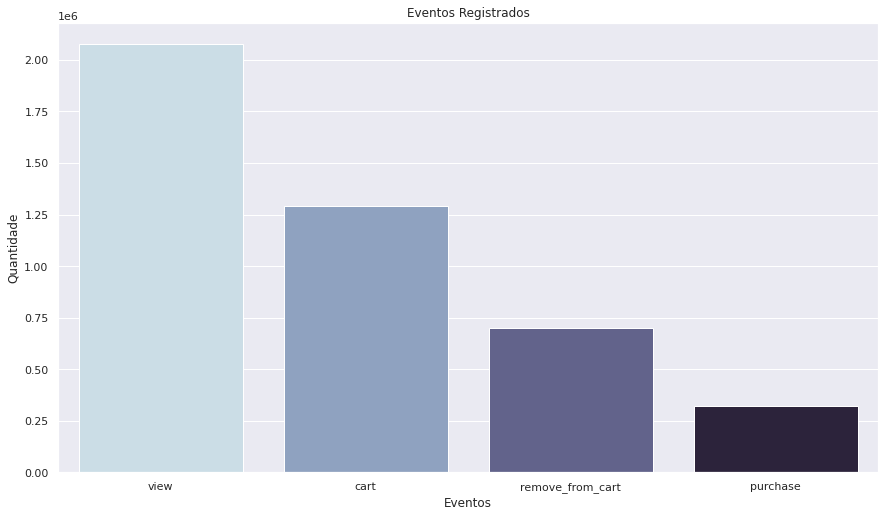

In [136]:
#Plotando gráfico de eventos usando o dataset com e sem marca.
events = dataset.event_type.value_counts()

sns.set(rc={'figure.figsize':(14.7,8.27)})

ax = sns.barplot(x=events.index, y=events, saturation= 0.75, order=['view', 'cart',
    'remove_from_cart', 'purchase'], palette="ch:s=.25,rot=-.25").set(
    title='Eventos Registrados', xlabel='Eventos', ylabel='Quantidade')

plt.show()

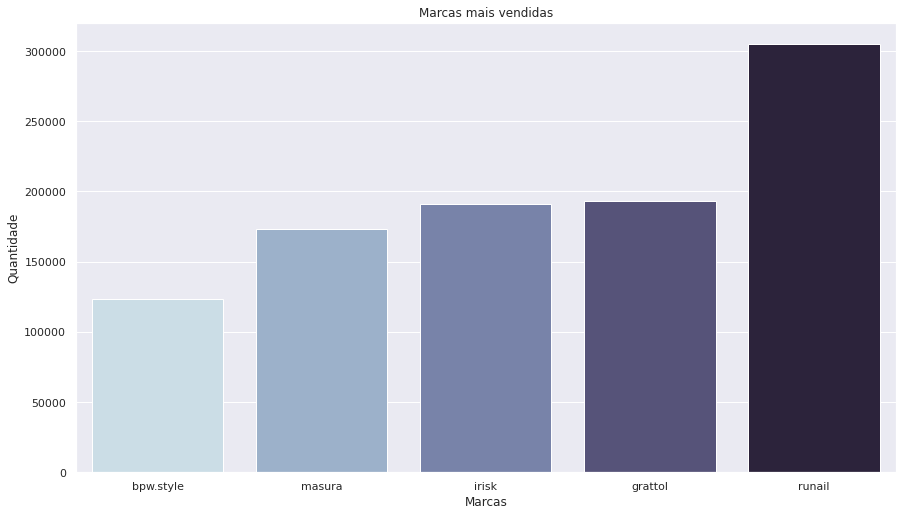

In [137]:
best_brands = df_branded[['brand', 'product_id']].groupby('brand').agg('count'
              ).sort_values('product_id').tail().reset_index()

ax = sns.barplot(x=best_brands.brand, y=best_brands.product_id, saturation= 0.75, 
                 palette="ch:s=.25,rot=-.25").set(title='Marcas mais vendidas',
                 xlabel='Marcas', ylabel='Quantidade')

